<h3> Imports

In [1]:
import numpy as np
import numpy as np
import json 
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
from sklearn.model_selection import train_test_split

<h3> Fetching data from .npy and .jsom files </h3>

1. signs.npy:
    - scaled to 32x32 px images having not undergone binarization process
    - the images are stored as 2D arrays of uint8 type filled with 0 or 255.
    - the arrays are collected into one 3D array having the following dimensions: (image_number x 32 x 32)
---
2. labels_int.npy:
    - class labels stored in the uint8 data type arrays. The labels are char codes described in the chapters 1 and 2 (0-88).
    - the array size is (image_number x 1).
    - i-th element of the class label array corresponds to the i-th elements of signs.npy and binarized_signs.npy files.
---
3. dictionary.json:
    - the dictionary of the character codes assigned to the characters 

In [9]:
from nn_with_py.utils.data_setup import load_files

PATH = "/Users/mikolajstarczewski/Desktop/Magisterka/NN_with_py/nn_with_py/data_fiiles/"

signs, labels = load_files(PATH)

<h3> Some basic info

In [10]:
print(f"")
print("SIGNS")
print(f"Type: {type(signs)}")
print(f"Shape: {signs.shape}")

print("LABELS")
print(f"Type: {type(labels)}")
print(f"Shape: {labels.shape}")
print(f"Characters index: {labels[33390]}")
print(len(labels))

# print("SIGNS DICT aka JSON")
# print(f"Type: {type(signs_dictionary)}")
# print(f"Length: {len(signs_dictionary)}")
# print(f"Character: {signs_dictionary[13]}")


SIGNS
Type: <class 'numpy.ndarray'>
Shape: (558155, 32, 32)
LABELS
Type: <class 'numpy.ndarray'>
Shape: (558155,)
Characters index: 13
558155


<h3> Occurrence of every character

In [11]:
values, indexes, count_values = np.unique(labels, return_index=True, return_counts=True)
for i in range(0, len(values)):
    print(f"Value {values[i]} - occurs {count_values[i]} times. With starting index of {indexes[i]}")

Value 0 - occurs 6161 times. With starting index of 0
Value 1 - occurs 6174 times. With starting index of 6161
Value 2 - occurs 6183 times. With starting index of 75504
Value 3 - occurs 6157 times. With starting index of 145899
Value 4 - occurs 6173 times. With starting index of 214147
Value 5 - occurs 6154 times. With starting index of 283548
Value 6 - occurs 6149 times. With starting index of 355115
Value 7 - occurs 6160 times. With starting index of 422474
Value 8 - occurs 6168 times. With starting index of 489782
Value 9 - occurs 6168 times. With starting index of 551987
Value 10 - occurs 6072 times. With starting index of 12335
Value 11 - occurs 6129 times. With starting index of 18407
Value 12 - occurs 6058 times. With starting index of 24536
Value 13 - occurs 6107 times. With starting index of 30594
Value 14 - occurs 7154 times. With starting index of 36701
Value 15 - occurs 6112 times. With starting index of 43855
Value 16 - occurs 6097 times. With starting index of 49967
Value

<h3> Separation data into train, test and validation sets


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(signs, labels, test_size=0.2, stratify=labels)

In [13]:
values, count_values = np.unique(Y_test, return_counts=True)
for i in range(0, len(values)):
    print(f"Value {values[i]} - occurs {count_values[i]} times.")

Value 0 - occurs 1232 times.
Value 1 - occurs 1235 times.
Value 2 - occurs 1237 times.
Value 3 - occurs 1231 times.
Value 4 - occurs 1235 times.
Value 5 - occurs 1231 times.
Value 6 - occurs 1230 times.
Value 7 - occurs 1232 times.
Value 8 - occurs 1234 times.
Value 9 - occurs 1234 times.
Value 10 - occurs 1214 times.
Value 11 - occurs 1226 times.
Value 12 - occurs 1212 times.
Value 13 - occurs 1221 times.
Value 14 - occurs 1431 times.
Value 15 - occurs 1222 times.
Value 16 - occurs 1219 times.
Value 17 - occurs 1434 times.
Value 18 - occurs 1230 times.
Value 19 - occurs 1224 times.
Value 20 - occurs 1222 times.
Value 21 - occurs 1223 times.
Value 22 - occurs 1219 times.
Value 23 - occurs 1221 times.
Value 24 - occurs 1432 times.
Value 25 - occurs 1223 times.
Value 26 - occurs 1217 times.
Value 27 - occurs 1428 times.
Value 28 - occurs 1221 times.
Value 29 - occurs 1436 times.
Value 30 - occurs 1432 times.
Value 31 - occurs 1221 times.
Value 32 - occurs 1222 times.
Value 33 - occurs 12

In [14]:
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5, stratify=Y_test)


<h3> Saving datasets for working with Neural Network


In [15]:
DATA_SAVE_PATH = "/Users/mikolajstarczewski/Desktop/Magisterka/NN_with_py/nn_with_py/data_files/"

np.save(DATA_SAVE_PATH + "X_train", X_train)
np.save(DATA_SAVE_PATH + "Y_train", Y_train)
np.save(DATA_SAVE_PATH + "X_test", X_test)
np.save(DATA_SAVE_PATH + "Y_test", Y_test)
np.save(DATA_SAVE_PATH + "X_val", X_val)
np.save(DATA_SAVE_PATH + "Y_val", Y_val)

<h3 >Tests

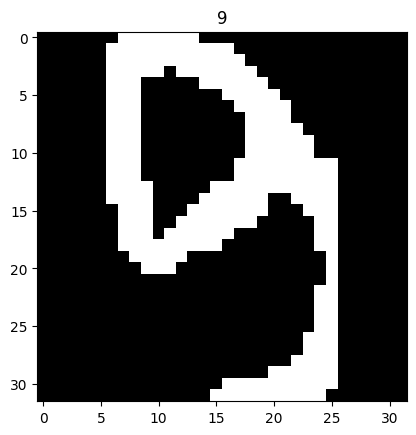

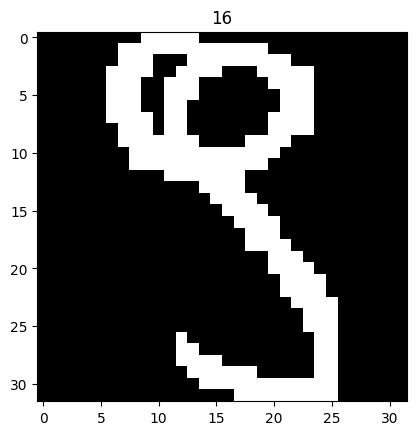

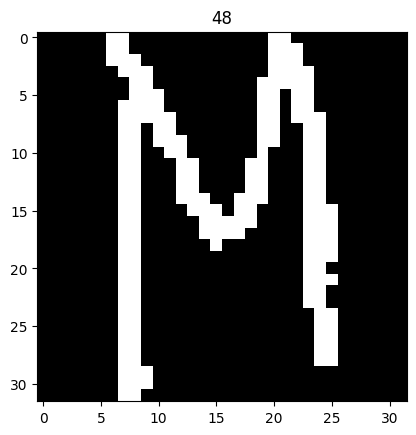

In [26]:
for index in range(0, 3):
    plt.title((Y_train[index]))
    plt.imshow(X_train[index].reshape(32,32), cmap=cm.binary)
    plt.show()